In [1]:
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [2]:
ds_hb = xr.open_dataset("../data/20241227/merged-20241227.nc")
ds_hb

<xarray.Dataset> Size: 55MB
Dimensions:  (id: 786, time: 8800)
Coordinates:
  * id       (id) int64 6kB 1 2 3 4 5 6 7 8 9 10 ... 57 58 59 60 61 62 63 64 65
    device   (id) int64 6kB ...
    name     (id) <U28 88kB ...
Dimensions without coordinates: time
Data variables:
    signal   (id, time) float64 55MB ...
    hb       (id) float64 6kB ...

In [32]:
single_signal = ds_hb["signal"][0].to_numpy()[:4400]
single_signal

array([  477.,   489.,   483., ..., 41464., 41456., 41454.], shape=(4400,))

## Exploratory Data Analysis

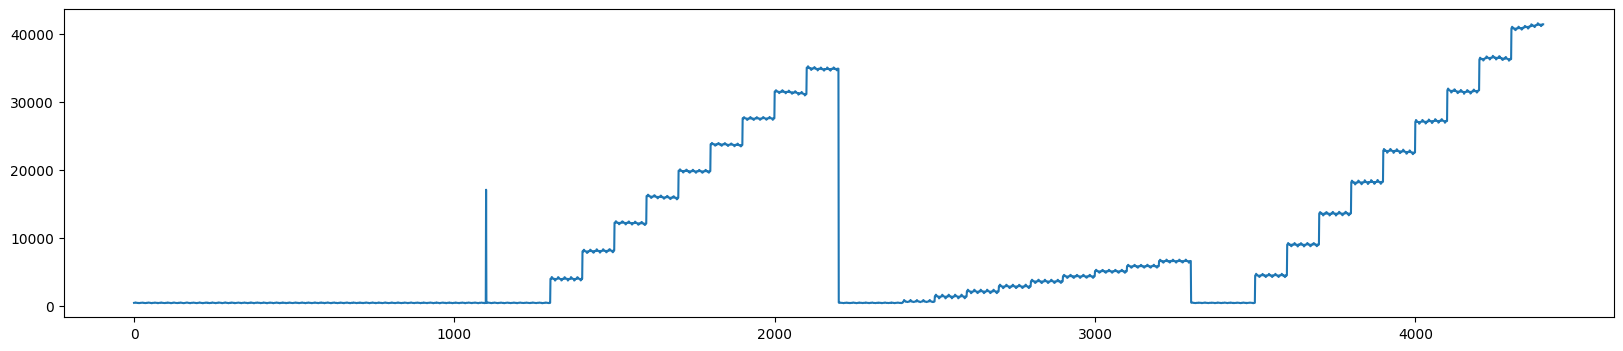

In [33]:
plt.figure(figsize=(20, 4))
plt.plot(single_signal)

### Baseline Correction

In [34]:
sig_baseline_corr = single_signal[1100:] - np.mean(single_signal[:1100])
sig_baseline_corr

array([-1.66518182e+01, -1.06518182e+01, -1.06518182e+01, ...,
        4.09723482e+04,  4.09643482e+04,  4.09623482e+04], shape=(3300,))

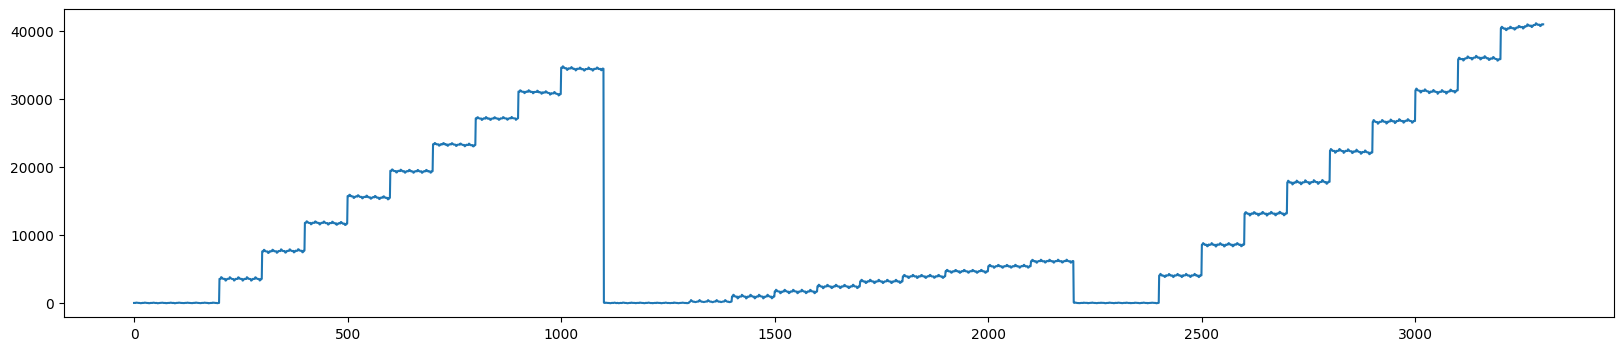

In [35]:
plt.figure(figsize=(20, 4))
plt.plot(sig_baseline_corr)

### Discrete Fourier Transform (DFT)

In [36]:
from scipy.fft import fft
from scipy.signal import find_peaks
from scipy.signal.windows import blackman, hamming

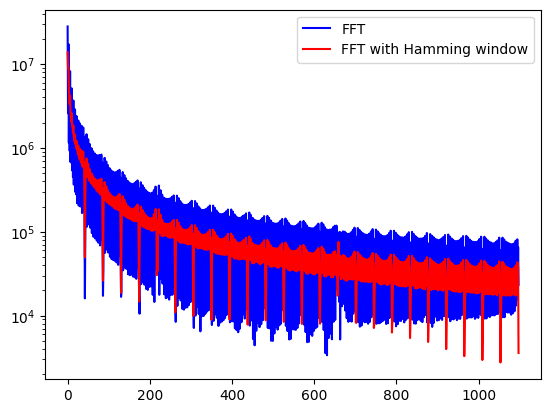

In [37]:
sig = np.array(single_signal)
w = hamming(sig.shape[0])
xw = np.abs(fft(sig * w))[1:sig.shape[0]//2]
xx = np.abs(fft(sig))[1:sig.shape[0]//2]

plt.semilogy(xx[1:xx.shape[0]//2], '-b', label="FFT")
plt.semilogy(xw[1:xw.shape[0]//2], '-r', label="FFT with Hamming window")
plt.legend()
plt.show()

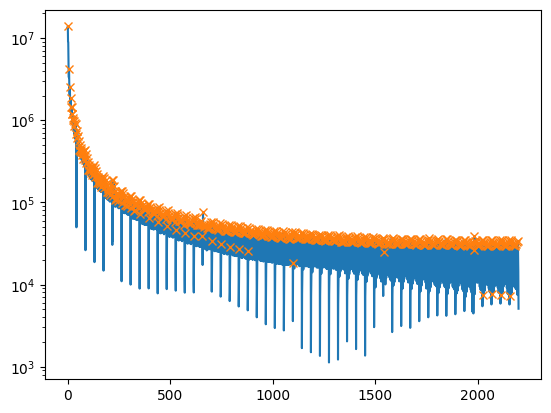

In [45]:
peaks, properties = find_peaks(xw)
plt.semilogy(xw)
plt.semilogy(peaks, xw[peaks], "x")
plt.semilogy(np.zeros_like(xw), "--", color="gray")
plt.show()

### Savitzky-Golay Filter

In [46]:
from scipy.signal import savgol_filter

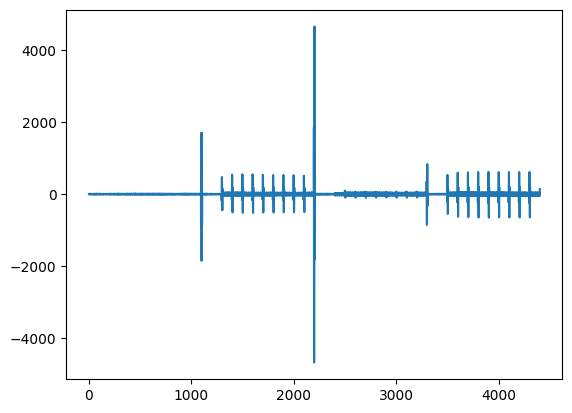

In [47]:
sig_savgol = savgol_filter(single_signal, 11, 5, 2)
plt.plot(sig_savgol)

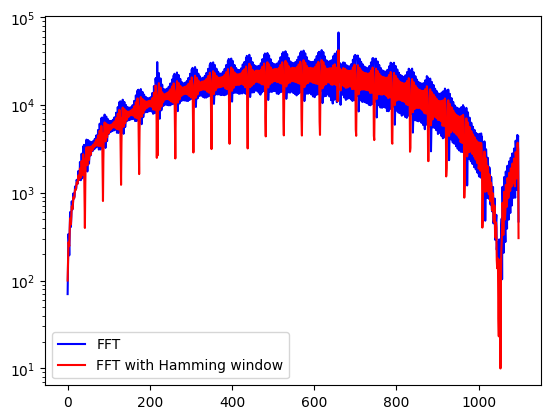

In [48]:
sig = np.array(sig_savgol)
w = hamming(sig.shape[0])
xw = np.abs(fft(sig * w))[1:sig.shape[0]//2]
xx = np.abs(fft(sig))[1:sig.shape[0]//2]

plt.semilogy(xx[1:xx.shape[0]//2], '-b', label="FFT")
plt.semilogy(xw[1:xw.shape[0]//2], '-r', label="FFT with Hamming window")
plt.legend()
plt.show()